In [2]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import pywt
import hurst
import antropy as ant
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score
from scipy.fft import fft
from scipy.signal import welch, resample

In [4]:
import pandas as pd
X_train_scaled_df = pd.read_csv('train2/Untitled Folder/X_train_selected.csv')
X_test_scaled_df = pd.read_csv('train2/Untitled Folder/X_test_selected.csv')
y_train = pd.read_csv('train2/Untitled Folder/y_train_selected.csv')
y_test = pd.read_csv('train2/Untitled Folder/y_test_selected.csv')

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Huấn luyện mô hình Random Forest
# ---------------------------

# Khởi tạo LabelEncoder để chuyển đổi nhãn từ [1, 2, ..., 10] thành [0, 1, ..., 9]
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Khởi tạo mô hình Random Forest
random_forest_model = RandomForestClassifier(
    n_estimators=100,  # Số lượng cây quyết định
    max_depth=6,       # Độ sâu tối đa của cây
    random_state=42    # Để tái tạo kết quả khi chạy lại mô hình
)

# Huấn luyện mô hình Random Forest với tập huấn luyện đã mã hóa nhãn
random_forest_model.fit(X_train_scaled_df, y_train_encoded)

# Dự đoán trên tập kiểm tra
y_pred_encoded = random_forest_model.predict(X_test_scaled_df)

# Chuyển đổi nhãn dự đoán từ mã hóa trở lại dạng ban đầu
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# In báo cáo phân loại
print(classification_report(y_test, y_pred))


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy: 0.3442
              precision    recall  f1-score   support

           1       0.34      0.60      0.44       102
           2       0.25      0.35      0.29        86
           3       0.32      0.16      0.21        58
           4       0.26      0.26      0.26        54
           5       0.08      0.02      0.03        58
           6       0.24      0.24      0.24        72
           7       0.00      0.00      0.00        21
           8       0.35      0.30      0.32        60
           9       0.43      0.43      0.43       105
          10       0.51      0.49      0.50       119

    accuracy                           0.34       735
   macro avg       0.28      0.28      0.27       735
weighted avg       0.32      0.34      0.32       735



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


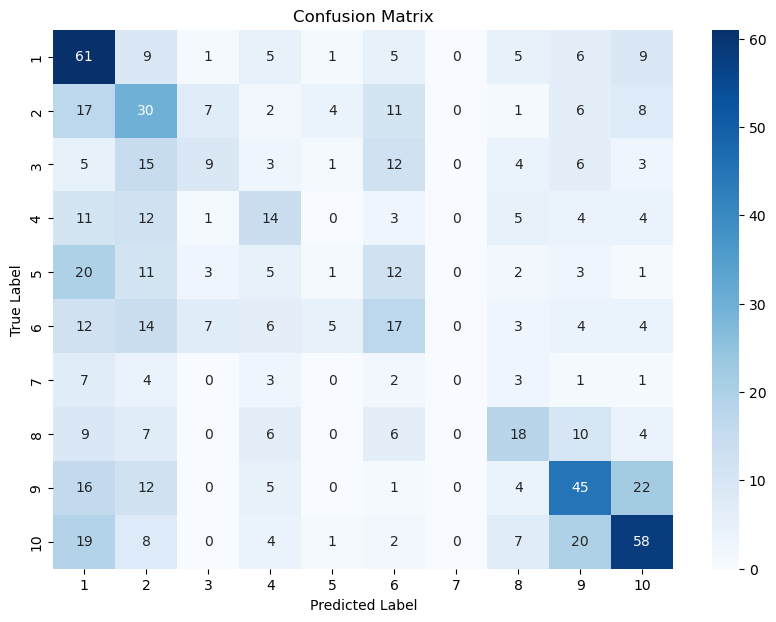

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ heatmap cho confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()